# AGGREGATION & COMBINATION

In [1]:
import pandas as pd

## Agregación de datos

`groupby, tabla dinámica y tabla cruzada`

In [8]:
df = pd.read_csv('../../../../evolve-data-python/datasets/avocado_kaggle.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### groupby
La función GroupBy de Pandas es una función potente y versátil en Python. Nos permite dividir los datos en grupos separados para realizar cálculos que permitan un mejor análisis.
Un DataFrame se puede agrupar en sus filas (eje=0) o en sus columnas (eje=1). Una vez hecho esto, se aplica una función a cada grupo, lo que produce un nuevo valor. Finalmente, los resultados de todas esas aplicaciones de funciones se combinan en un objeto de resultado. La forma del objeto resultante generalmente dependerá de lo que se haga con los datos.

`df[subset].groupby(category).aggregation()`

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html

In [12]:
# precio medio por año
df.groupby('year')['AveragePrice'].mean()


year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

In [18]:
df.groupby('year').agg({'AveragePrice':['mean','min','max']})

AveragePrice            
             mean   min   max
year                         
2015     1.375590  0.49  2.79
2016     1.338640  0.51  3.25
2017     1.515128  0.44  3.17
2018     1.347531  0.56  2.30

In [32]:
# ciudades con más filas
df.groupby('region').agg({'region':'count'}).head()

,region
region,
Albany,338
Atlanta,338
BaltimoreWashington,338
Boise,338
Boston,338


In [46]:
df.groupby('region')['region'].count().head()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
Name: region, dtype: int64

In [45]:
# precio por type
df.groupby(['type','year']).agg({'AveragePrice':['mean','min','max']})

AveragePrice            
                          mean   min   max
type         year                         
conventional 2015     1.077963  0.49  1.59
             2016     1.105595  0.51  2.20
             2017     1.294888  0.46  2.22
             2018     1.127886  0.56  1.74
organic      2015     1.673324  0.81  2.79
             2016     1.571684  0.58  3.25
             2017     1.735521  0.44  3.17
             2018     1.567176  1.01  2.30

In [ ]:
df.groupby(['year','type']).agg({'AveragePrice':['mean','min','max']})

AveragePrice            
                          mean   min   max
year type                                 
2015 conventional     1.077963  0.49  1.59
     organic          1.673324  0.81  2.79
2016 conventional     1.105595  0.51  2.20
     organic          1.571684  0.58  3.25
2017 conventional     1.294888  0.46  2.22
     organic          1.735521  0.44  3.17
2018 conventional     1.127886  0.56  1.74
     organic          1.567176  1.01  2.30

In [66]:
df.loc[[2015]]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
2015,2015-03-29,1.15,205954.04,54695.88,96405.61,11552.86,43299.69,42423.09,876.6,0.0,conventional,2015,RichmondNorfolk


In [68]:
df.iloc[2015]

Date                 2015-03-29
AveragePrice               1.15
Total Volume          205954.04
4046                   54695.88
4225                   96405.61
4770                   11552.86
Total Bags             43299.69
Small Bags             42423.09
Large Bags                876.6
XLarge Bags                 0.0
type               conventional
year                       2015
region          RichmondNorfolk
Name: 2015, dtype: object

In [202]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('../../../../evolve-data-python/datasets/employees.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


`agrupar por departamentos y su edad media`

In [72]:
df.groupby('Department').agg({'Age':['min','mean','max']}).reset_index()

Department Age               
                          min       mean max
0         Human Resources  19  37.809524  59
1  Research & Development  18  37.042664  60
2                   Sales  18  36.542601  60

`agrupar por departamentos y su edad máxima`

`agrupar por departamentos y su edad mínima`

`groupby: 2+`: Diferentes campos educativos y sus salarios medios en cada uno de los departamentos

In [75]:
df.groupby(['Department','EducationField']).agg({'Age':['min','mean','max']})#.reset_index()

Age               
                                        min       mean max
Department             EducationField                     
Human Resources        Human Resources   24  37.037037  59
                       Life Sciences     26  39.375000  56
                       Medical           24  39.846154  59
                       Other             29  34.666667  38
                       Technical Degree  19  32.500000  42
Research & Development Life Sciences     18  36.997727  60
                       Medical           18  37.242424  60
                       Other             21  36.187500  53
                       Technical Degree  20  37.063830  58
Sales                  Life Sciences     20  37.186667  59
                       Marketing         18  37.924528  60
                       Medical           18  34.727273  58
                       Other             19  32.000000  50
                       Technical Degree  19  33.941176  59

In [89]:
df.groupby(['Department','EducationField']).agg({'Age':['min','mean','max','median'],'MonthlyIncome':['min','mean','max','median']})#.reset_index()

Age                        \
                                        min       mean max median   
Department             EducationField                               
Human Resources        Human Resources   24  37.037037  59   36.0   
                       Life Sciences     26  39.375000  56   41.0   
                       Medical           24  39.846154  59   42.0   
                       Other             29  34.666667  38   37.0   
                       Technical Degree  19  32.500000  42   34.5   
Research & Development Life Sciences     18  36.997727  60   36.0   
                       Medical           18  37.242424  60   36.0   
                       Other             21  36.187500  53   35.5   
                       Technical Degree  20  37.063830  58   35.5   
Sales                  Life Sciences     20  37.186667  59   36.0   
                       Marketing         18  37.924528  60   36.0   
                       Medical           18  34.727273  58   34.0   
                       Other             19  32.000000  50   31.0   
                       Technical Degree  19  33.941176  59   33.0   

                                        MonthlyIncome                      \
                                                  min         mean    max   
Department             EducationField                                       
Human Resources        Human Resources           1555  7241.148148  19636   
                       Life Sciences             2064  6914.062500  19717   
                       Medical                   2109  6594.076923  18200   
                       Other                     2991  5016.666667   7988   
                       Technical Degree          2564  3081.250000   4323   
Research & Development Life Sciences             1051  6179.984091  19999   
                       Medical                   1009  6539.223140  19859   
                       Other                     1951  6278.687500  19613   
                       Technical Degree          1274  5760.819149  19943   
Sales                  Life Sciences             1118  7246.233333  19847   
                       Marketing                 1675  7348.584906  19845   
                       Medical                   1052  6377.227273  19833   
                       Other                     2121  5398.733333  10932   
                       Technical Degree          1091  6066.294118  16872   

                                                 
                                         median  
Department             EducationField            
Human Resources        Human Resources   3886.0  
                       Life Sciences     4014.5  
                       Medical           4936.0  
                       Other             4071.0  
                       Technical Degree  2719.0  
Research & Development Life Sciences     4394.0  
                       Medical           4422.0  
                       Other             4045.5  
                       Technical Degree  3990.5  
Sales                  Life Sciences     6146.0  
                       Marketing         6118.0  
                       Medical           5466.5  
                       Other             4805.0  
                       Technical Degree  5669.5

In [ ]:
# multiindex: https://pandas.pydata.org/docs/user_guide/advanced.html

`más campos`

#### agrupar y agregar

Otra forma de agrupar con sintaxis agg
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html

- media
- suma
- recuento

Supongamos que queremos calcular la media de la columna data1 utilizando las etiquetas de key1. Hay varias formas de hacerlo. Una es acceder a data1 y llamar a groupby con la columna (una String) en key1.
Los datos (una Serie) se han agregado en función de la clave de grupo, lo que produce una nueva String que ahora está indexada por los valores únicos de la columna key1. El índice resultante tiene el nombre 'key1' porque la columna DataFrame `df['key1']` lo tenía.

### Tablas dinámicas

[Comparación entre tabla dinámica y tabla agrupada](https://towardsdatascience.com/una-comparacion-entre-tabla-agrupada-y-tabla-dinámica-en-pythons-pandas-module-527909e78d6b?source=userActivityShare-4c6d9a33c6-1674605913&_branch_match_id=1146490620103499300&_branch_referrer=H4sIAAAAAAAAA8soKSkottLXz8nMy9bLTU3JLM3VS87P1TfKCvCtKvOvCCpPAgAN4ht%2FIwAAAA%3D%3D)

```pivot_table(df, valores=Ninguno, índice=Ninguno, columnas=Ninguno, aggfunc='media', ...)```

* Podemos crear una tabla dinámica de estilo hoja de cálculo como un DataFrame. Los niveles de la tabla dinámica se almacenarán en objetos MultiIndex (índices jerárquicos) en el índice y las columnas del DataFrame resultante.

In [90]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Tabla dinámica: el departamento y sus edades medias

In [97]:
pd.pivot_table(df, values='Age', index='Department', aggfunc='mean')

,Age
Department,
Human Resources,37.809524
Research & Development,37.042664
Sales,36.542601


Tabla dinámica: el departamento y sus edades máximas

In [102]:
pd.pivot_table(df, values='Age', index=['Department','EducationField'], aggfunc=['min','mean','median','max'])

min       mean median max
                                        Age        Age    Age Age
Department             EducationField                            
Human Resources        Human Resources   24  37.037037   36.0  59
                       Life Sciences     26  39.375000   41.0  56
                       Medical           24  39.846154   42.0  59
                       Other             29  34.666667   37.0  38
                       Technical Degree  19  32.500000   34.5  42
Research & Development Life Sciences     18  36.997727   36.0  60
                       Medical           18  37.242424   36.0  60
                       Other             21  36.187500   35.5  53
                       Technical Degree  20  37.063830   35.5  58
Sales                  Life Sciences     20  37.186667   36.0  59
                       Marketing         18  37.924528   36.0  60
                       Medical           18  34.727273   34.0  58
                       Other             19  32.000000   31.0  50
                       Technical Degree  19  33.941176   33.0  59

`tabla dinámica`: el departamento y sus edades mínimas

Tabla dinámica: el departamento y su edad media

Tabla dinámica de múltiples índices: Departamento y campo de educación y verificación de los valores salariales máximos de los empleados

<Axes: xlabel='Department,EducationField'>

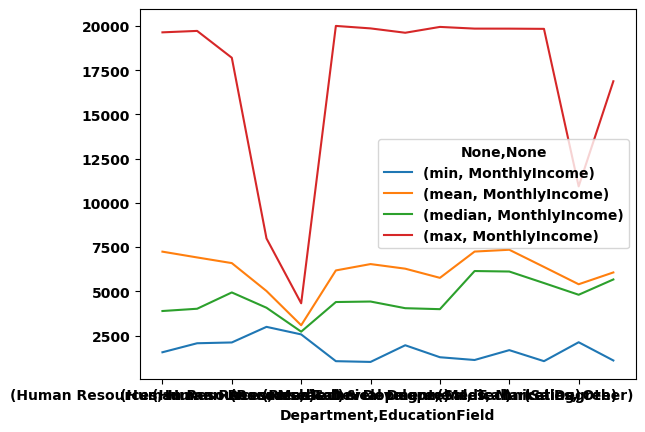

In [ ]:
pd.pivot_table(df, values='MonthlyIncome', index=['Department','EducationField'], aggfunc=['min','mean','median','max']).plot()

<Axes: >

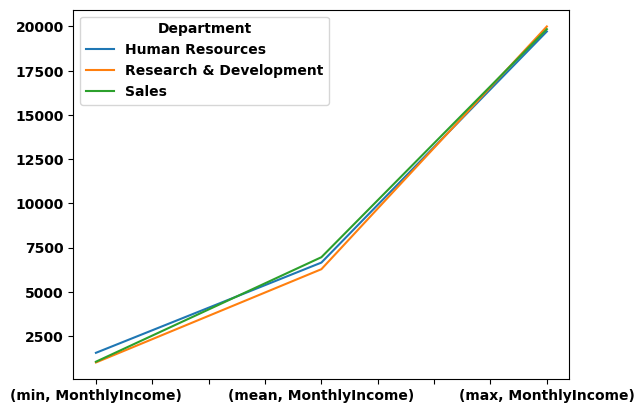

In [111]:
pd.pivot_table(df, values='MonthlyIncome', index=['Department'], aggfunc=['min','mean','max']).T.plot()

### Diferencias entre la tabla dinámica y la función groupby

In [104]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


`groupby`: edad media del equipo por abreviatura del equipo y temporada.

`pivot_table`: edad media del equipo por abreviatura del equipo y temporada.

### Crosstab

* Calcular una tabulación cruzada simple de dos (o más) factores. De manera predeterminada, calcula una tabla de frecuencias de los factores a menos que se pase una matriz de valores y una función de agregación. Generalmente se utiliza para ver la frecuencia de dos variables cualitativas: cuántas veces el valor de una columna aparece en la otra.

```pd.crosstab(df[columna1], df[columna2])```

In [112]:
pd.crosstab(df.Department, df.EducationField)

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Department,,,,,,
Human Resources,27,16,0,13,3,4
Research & Development,0,440,0,363,64,94
Sales,0,150,159,88,15,34


-------------------------------------------------- -------------------------------------------------- -------------------------------------------------- -------------------------------------------------- ----

## Hands-on

In [122]:
pd.pivot_table(df, values='MonthlyIncome', index=['Department'], aggfunc=['min','mean','max'])

,min,mean,max
,MonthlyIncome,MonthlyIncome,MonthlyIncome
Department,,,
Human Resources,1555,6654.507937,19717
Research & Development,1009,6281.252862,19999
Sales,1052,6959.172646,19847


In [133]:
pd.crosstab(columns=df['Department'], index=df['Department'], values = df["MonthlyIncome"], aggfunc=['min','mean','max']).T


Department                   Human Resources  Research & Development  \
     Department                                                        
min  Human Resources             1555.000000                     NaN   
     Research & Development              NaN             1009.000000   
     Sales                               NaN                     NaN   
mean Human Resources             6654.507937                     NaN   
     Research & Development              NaN             6281.252862   
     Sales                               NaN                     NaN   
max  Human Resources            19717.000000                     NaN   
     Research & Development              NaN            19999.000000   
     Sales                               NaN                     NaN   

Department                          Sales  
     Department                            
min  Human Resources                  NaN  
     Research & Development           NaN  
     Sales                    1052.000000  
mean Human Resources                  NaN  
     Research & Development           NaN  
     Sales                    6959.172646  
max  Human Resources                  NaN  
     Research & Development           NaN  
     Sales                   19847.000000

#### Import `business.csv` and respond to to following questions:
##### Revenue & Sales Analysis
	1.	Which country has generated the highest total sales?
	2.	Which city has the highest average purchase amount?
	3.	What is the total revenue for each product category?
	4.	Which country has the most transactions with negative amounts?
	5.	How many purchases were made without a discount, and how much revenue did they generate?
##### Customer Insights
	6.	Who is the top-spending customer overall?
	7.	Which customer has spent the most in the “Electronics” category?
	8.	How many customers have made repeat purchases?
	9.	Which customer has received the most discounts?
##### Review Sentiment & Correlations
	10.	Are negative reviews correlated with low purchase amounts?
	11.	Which country has the most positive vs. negative reviews?
	12.	Do customers who received discounts leave better reviews?
	13.	Are refunds (negative amounts) more common among customers who left bad reviews?

In [228]:
def clean (df):
    """
    # 1. nombre columnas
    # 2. amount paid
    # 3. discount_applied:True/False o Yes/No?
    # 4. customer_id: vienen con letras
    # 5. formato fechas
    """
    df = pd.read_csv("../../../../evolve-data-python/datasets/business.csv")

    # 1. Nombre columnas
    df.columns = [i.lower() for i in df.columns]
    df.columns = [i.replace("!", "").replace("#", "").replace("(", "").replace(")", "").replace("$", "").replace("@", "") for i in df.columns]
    df.columns = [i.replace("_", " ").strip().replace(" ", "_") for i in df.columns]

    # 2. Amount paid
    df['amount_paid'] = df['amount_paid'].astype(str).str.replace('$', '', regex=False)
    df['amount_paid'] = df['amount_paid'].str.strip()
    df['amount_paid'] = pd.to_numeric(df['amount_paid'], errors='coerce')
    df['amount_paid'].unique()

    # 3. Descuento
    df["discount_applied"] = df["discount_applied"].apply(lambda x: True if str(x).strip().lower() == 'yes' else "Unknown" if str(x).strip().lower() == "unknown" else False)

    # 4. id_cliente
    def funcioncita_letras (x):
        if type(x) == str: # Si es tipo NaN, devuelve NaN
            for i in x:
                if not i.isdigit():
                    x = x.replace(i, "")
        return x


    df["customer_id"] = df["customer_id"].apply(funcioncita_letras)

    # 5. Fechas
    df["purchase_date"] = pd.to_datetime(df["purchase_date"], format="mixed", infer_datetime_format=True)
    
    df.sample()
    return df

df = clean (df)
df.sample()

C:\Users\Oscar\AppData\Local\Temp\ipykernel_2852\1587622794.py:37: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["purchase_date"] = pd.to_datetime(df["purchase_date"], format="mixed", infer_datetime_format=True)


,customer_id,purchase_date,product_category,amount_paid,discount_applied,country,city,customer_review
350,450,2023-06-21,Electronics,NaN,True,Italy,NaN,Would buy again!


In [229]:
df.head()

,customer_id,purchase_date,product_category,amount_paid,discount_applied,country,city,customer_review
0,100,2023-09-21,Electronics,NaN,False,Germany,Toronto,Excellent product!
1,NaN,NaT,NaN,NaN,False,Spain,Rome,Customer service was awful.
2,NaN,2023-06-18,Clothing,NaN,False,Mexico,Paris,Worst purchase ever.
3,103,2023-11-26,Home,200.0,True,Germany,Los Angeles,Customer service was awful.
4,104,2023-11-16,Clothing,NaN,False,USA,Toronto,Customer service was awful.


In [230]:
# 1. Which country has generated the highest total sales?
df.groupby('country').agg({'amount_paid':['min','mean','max','sum','count']}).head(1)

amount_paid                                  
                min        mean    max      sum count
country                                              
Canada       -197.0  189.681818  495.0  16692.0    88

In [231]:
# 2. Which city has the highest average purchase amount?
df.groupby('city').agg({'city':'count','amount_paid':'sum'}).sort_values(by='amount_paid', ascending=False).head(1)


,city,amount_paid
city,,
Toronto,135,18996.0


In [232]:
# 3. What is the total revenue for each product category?
df.groupby('product_category').agg({'amount_paid':'sum'})


,amount_paid
product_category,
Clothing,30926.0
Electronics,32270.0
Home,34038.0


In [233]:
# 4. Which country has the most transactions with negative amounts?
df.loc[(df.amount_paid < 0)].groupby('country').agg({'amount_paid':'count'}).sort_values(by='amount_paid', ascending=False)

,amount_paid
country,
Canada,14
UK,11
Italy,10
France,9
Germany,6
USA,5
Spain,4
Mexico,3


In [234]:
# 5. How many purchases were made without a discount, and how much revenue did they generate?
df.discount_applied.unique()

array([False, True, 'Unknown'], dtype=object)

In [235]:
df.loc[(df.discount_applied == False)|(df.discount_applied == 'Unknown')].discount_applied.count()

np.int64(862)

In [236]:
df.loc[(df.discount_applied == False)].agg({'amount_paid':'sum'})

amount_paid    99995.0
dtype: float64

In [237]:
# 6. Who is the top-spending customer overall?
df.groupby('customer_id').agg(total_pedidos=('customer_id','count')).sort_values(by='total_pedidos', ascending=False)

,total_pedidos
customer_id,
599,2
559,2
562,2
563,2
547,2
...,...
556,1
557,1
558,1


In [238]:
df.groupby('customer_id').agg({'customer_id':'count'})


,customer_id
customer_id,
100,2
101,1
103,1
104,2
105,2
...,...
595,1
596,2
597,1


In [239]:
# 7. Which customer has spent the most in the “Electronics” category?

df.loc[df.product_category=='Electronics'].groupby('customer_id').agg({'amount_paid':'sum'}).sort_values(by='amount_paid', ascending=False).head(1)

,amount_paid
customer_id,
350,766.0


In [285]:
# 8. How many customers have made repeat purchases?
# Cuantos customer_id estan mas de una vez?
morethan1 = df.groupby('customer_id').agg(customer_count = ('customer_id','count'))
morethan1.loc[morethan1.customer_count > 1].count()

customer_count    233
dtype: int64

In [286]:
df.head()

,customer_id,purchase_date,product_category,amount_paid,discount_applied,country,city,customer_review
0,100,2023-09-21,Electronics,NaN,False,Germany,Toronto,Excellent product!
1,NaN,NaT,NaN,NaN,False,Spain,Rome,Customer service was awful.
2,NaN,2023-06-18,Clothing,NaN,False,Mexico,Paris,Worst purchase ever.
3,103,2023-11-26,Home,200.0,True,Germany,Los Angeles,Customer service was awful.
4,104,2023-11-16,Clothing,NaN,False,USA,Toronto,Customer service was awful.


In [293]:
# 9. Which customer has received the most discounts?
df.loc[df.discount_applied == True].groupby('customer_id').agg(customer_count = ('customer_id','count')).sort_values(by='customer_count', ascending=False).head(1)

,customer_count
customer_id,
176,2


## Combinación de datos: mezcla de Dataframes

- https://realpython.com/pandas-merge-join-and-concat/
- https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

### Concatenación: dos cosas juntas
Unimos los dataframes a lo largo del eje 0, uno debajo del otro. Alineamos las columnas por etiqueta.

In [207]:
df = df.reset_index()
df

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


#### Concatenación en el eje 0 (filas)

In [208]:
list(df.columns)

['index',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [209]:
df2 = df[['index',
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike']]
df2

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14


In [214]:
columnas_eliminar= [
 'Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike']

df3 = df.drop(columns=columnas_eliminar)
df3

,index,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,3,1,80,0,8,0,1,6,4,0,5
1,1,4,4,80,1,10,3,3,10,7,1,7
2,2,3,2,80,0,7,3,3,0,0,0,0
3,3,3,3,80,0,8,3,3,8,7,3,0
4,4,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,3,3,80,1,17,3,3,5,2,0,3
1466,1466,3,1,80,1,9,5,3,7,7,1,7
1467,1467,4,2,80,1,6,0,3,6,2,0,3
1468,1468,3,4,80,0,17,3,2,9,6,0,8


#### Concatenación en el eje 1 (columnas)

In [215]:
df4 = pd.merge(left=df2, right=df3, how='inner', on='index')
df4

,index,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


![Uniones SQL](https://upload.wikimedia.org/wikipedia/commons/9/9d/SQL_Joins.svg)

### MERGE: columnas relacionadas

[Merge()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) es más útil cuando desea fusionar filas que comparten datos.

In [ ]:
from IPython.display import display_html 

In [ ]:
df1 = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)


df2 = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

df3 = pd.DataFrame(
    {
        "key1": ["K90", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K5", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "Y": ["D0", "D70", "D2", "D5"],
    }
)

In [ ]:
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

In [ ]:
# merge, default is inner

result = pd.merge(df1, df2)
result

#### LEFT MERGE

In [ ]:
left_merge = pd.merge(df1, df2, how="left")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
left_merge = left_merge.style.set_table_attributes("style='display:inline'").set_caption("left_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

In [ ]:
display_html(left_merge._repr_html_(), raw=True)

#### RIGHT MERGE

In [ ]:
right_merge = pd.merge(df1, df2, how="right")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
right_merge = right_merge.style.set_table_attributes("style='display:inline'").set_caption("right_merge")

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(),raw=True)

In [ ]:
display_html(right_merge._repr_html_(), raw=True)

#### Fusión INTERNA

In [ ]:
inner_merge = pd.merge(df1, df2, how="inner")


df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
inner_merge = inner_merge.style.set_table_attributes("style='display:inline'").set_caption("inner_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

In [ ]:
display_html(inner_merge._repr_html_(), raw=True)

#### OUTER MERGE

In [ ]:
outer_merge = pd.merge(df1, df2, how="outer")

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Right table')
outer_merge = outer_merge.style.set_table_attributes("style='display:inline'").set_caption("outer_merge")

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

In [ ]:
display_html(outer_merge._repr_html_(), raw=True)

### JOIN & CONCAT on different columns

In [ ]:
df1_docs = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2_docs = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [ ]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

#### Concatenación en dos columnas diferentes

In [ ]:
concat_docs = pd.concat([df1_docs, df2_docs], axis=1, keys=["1st table", "2nd table"])

df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = concat_docs.style.set_table_attributes("style='display:inline'").set_caption('concat_docs')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

In [ ]:
display_html(merge_styler._repr_html_(), raw=True)

#### Merge en dos columnas diferentes

In [ ]:
df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_() +  " " + df2_styler._repr_html_(), raw=True)

In [ ]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_fromleft", "_fromright"])

In [ ]:
merge_docs = df1_docs.merge(df2_docs, left_on='lkey', right_on='rkey', suffixes = ["_from_left", "_from_right"])


df1_styler = df1_docs.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = df2_docs.style.set_table_attributes("style='display:inline'").set_caption('Right table')
merge_styler = merge_docs.style.set_table_attributes("style='display:inline'").set_caption('merge_docs')

display_html(df1_styler._repr_html_() + " " + df2_styler._repr_html_(), raw=True)

In [ ]:
display_html(merge_styler._repr_html_(), raw=True)

In [ ]:
# suffixes: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [ ]:
# concat: putting things together
# join/merge: putting things together THAT ARE RELATED
    # related info in the same place -> reduces redundancy

### Join: índice relacionado
El join, a diferencia del merge, unirá los dataframes y donde no haya registros en el "índice" pondrá NaN

In [ ]:
import numpy as np
import pandas as pd   
from IPython.display import display_html 

In [ ]:
left_df = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)


right_df = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

In [ ]:
df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

In [ ]:
result = left_df.join(right_df, how="inner")

#Rendering the df's in the same line. No need to learn this code

df1_styler = left_df.style.set_table_attributes("style='display:inline'").set_caption('Left table')
df2_styler = right_df.style.set_table_attributes("style='display:inline'").set_caption('Right table')
df1_df2_merged = result.style.set_table_attributes("style='display:inline'").set_caption('JOIN')

display_html(df1_styler._repr_html_()+ df2_styler._repr_html_() + df1_df2_merged._repr_html_(), raw=True)
#display_html(df1_styler._repr_html_()+ df2_styler._repr_html_(), raw=True)

<figure class="wp-block-table is-style-stripes"><table class="has-fixed-layout"><thead><tr><th><strong>Función de unión</strong></th><th class="has-text-align-center" data-align="center"><strong>join()</strong></th><th class="has-text-align-center" data-align="center"><strong>merge()</strong></th></tr></thead><tbody><tr><td>interior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>izquierda</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>derecha</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>exterior</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>cruz</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unión en índices</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>Unirse en columnas</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en la columna, a la derecha en el índice</td><td class="has-text-align-center" data-align="center">Sí</td><td class="has-text-align-center" data-align="center">Sí</td></tr><tr><td>A la izquierda en el índice, a la derecha en la columna</td><td class="has-text-align-center" data-align="center">X</td><td class="has-text-align-center" data-align="center">Sí</td></tr></tbody></table>

## Métodos habituales de Pandas
```python
df.head() # imprime la cabecera, por defecto 5 filas
df.tail() # establece la cola, por defecto 5 filas
df.describe() # descripción estadística
df.info() # información del df
df.columns # muestra la columna
df.index # muestra el índice
df.dtypes # muestra los tipos de datos de la columna
df.plot() # hace un gráfico
df.hist() # hace un histograma
df.col.value_counts() # cuenta los valores únicos de una columna
df.col.unique() # devuelve valores únicos de una columna
df.copy() # copia el df
df.drop() # elimina columnas o filas (axis=0,1)
df.dropna() # elimina nulos
df.fillna() # rellena nulos
df.shape # dimensiones del df
df._get_numeric_data() # selecciona numérico columnas
df.rename() # renombrar columnas
df.str.replace() # reemplazar columnas de cadenas
df.astype(dtype='float32') # cambiar el tipo de datos
df.iloc[] # localizar por índice
df.loc[] # localizar por elemento
df.transpose() # transpone el df
df.T
df.sample(n, frac) # muestra de df
df.col.sum() # suma de una columna
df.col.max() # máximo de una columna
df.col.min() # mínimo de una columna
df[col] # seleccionar columna
df.col
df.isnull() # valores nulos
df.isna()
df.notna() # valores no nulos
df.drop_duplicates() # eliminar duplicados
df.reset_index(inplace=True) # restablecer el índice y sobrescribir
```

## Materiales adicionales

* [¡Lea la documentación!](https://pandas.pydata.org/pandas-docs/stable/index.html)
* [Hoja de trucos](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
* [Ejercicios para practicar](https://github.com/guipsamora/pandas_exercises)
* [Más información sobre fusión, concatenación y unión](https://realpython.com/pandas-merge-join-and-concat/#pandas-join-combining-data-on-a-column-or-index). Y [¡aún más!](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html)